In [1]:
import os
import pandas as pd
import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

2025-03-20 14:24:34.414669: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-20 14:24:37.837270: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


scanpy==1.10.4 anndata==0.11.3 umap==0.5.6 numpy==1.26.4 scipy==1.13.0 pandas==2.2.3 scikit-learn==1.4.2 statsmodels==0.14.4 igraph==0.11.8 pynndescent==0.5.12


In [ ]:
ADATA_FP = '/work/hdd/bbjr/mallina1/data/mb-ml-dev-vm/data/pbmc_adata.h5ad'
GENE_INFO_FP = '/work/hdd/bbjr/mallina1/data/mb-ml-dev-vm/gene_info.tsv'

In [3]:
adata = sc.read_h5ad(ADATA_FP)

/u/mallina1/envs/torch_jax2/lib/python3.10/site-packages/anndata/_core/aligned_df.py:68: ImplicitModificationWarning: Transforming to str index.
  warnings.warn("Transforming to str index.", ImplicitModificationWarning)


In [4]:
adata.obs.CellType.value_counts()

CellType
Cytotoxic T cell               8878
CD4+ T cell                    7279
CD14+ monocyte                 5490
B cell                         4941
Natural killer cell            1515
Megakaryocyte                   963
CD16+ monocyte                  786
Dendritic cell                  433
Plasmacytoid dendritic cell     164
Unassigned                       46
Name: count, dtype: int64

In [5]:
ct_adata = adata[adata.obs.CellType == 'CD4+ T cell']
ct_adata_pbmc1 = ct_adata[ct_adata.obs.Experiment == 'pbmc1']

In [6]:
ct_adata_pbmc1.obs.Method.value_counts()

Method
10x Chromium (v3)      960
10x Chromium (v2) B    908
Drop-seq               889
10x Chromium (v2) A    550
inDrops                512
Seq-Well               435
CEL-Seq2                67
Name: count, dtype: int64

In [28]:
assay1 = '10x Chromium (v3)'
assay2 = 'inDrops'
# assay2 = '10x Chromium (v2) B'

In [29]:
a1_X_g = np.array(ct_adata_pbmc1[ct_adata_pbmc1.obs.Method == assay1].X.sum(0)).squeeze()
a2_X_g = np.array(ct_adata_pbmc1[ct_adata_pbmc1.obs.Method == assay2].X.sum(0)).squeeze()

In [30]:
# Convert to TPM along gene axis

a1_X_g = a1_X_g / np.sum(a1_X_g) * 1000000
a2_X_g = a2_X_g / np.sum(a2_X_g) * 1000000

Text(0, 0.5, 'inDrops')

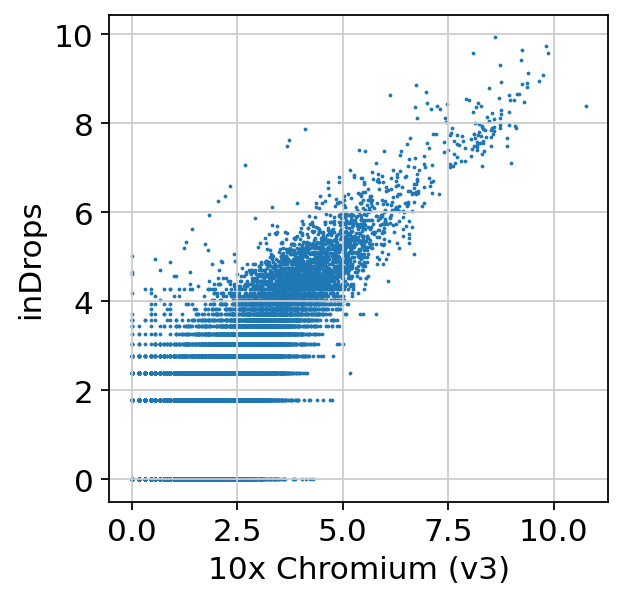

In [31]:
plt.scatter(np.log1p(a1_X_g), np.log1p(a2_X_g), s=0.5)
plt.xlabel(assay1)
plt.ylabel(assay2)

In [32]:
r2 = r2_score(np.log1p(a1_X_g), np.log1p(a2_X_g))
r2

0.7638021043894008